In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
    

## Preprocessing

We transform the csv file into a pandas dataframe

In [41]:
df_cases = pd.read_csv('time_series_covid19_confirmed_global.csv').transpose()
df_cases.columns = df_cases.iloc[1]
df_cases = df_cases.iloc[4:]
df_cases.index = pd.to_datetime(df_cases.index,format='%m/%d/%y')
df_cases.index.name = 'Date'
df_cases.head()
#TODO - some countries have different entries for different regions, need to decide whether to countseparately (and rename) or merge.


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Burundi,Sierra Leone,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


##  We use a Prohet model to predict the last 10 values for 'US'

How Prophet works

At its core, the Prophet procedure is an additive regression model with four main components:

    A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
    A yearly seasonal component modeled using Fourier series.
    A weekly seasonal component using dummy variables.
    A user-provided list of important holidays.

TODO: compare how model performs on y, vs on log(y) 
Perhaps we should be directly working on log(y)

In [143]:
from fbprophet import Prophet
m = Prophet()

prophet_df = pd.DataFrame(df_cases['US'])
prophet_df['ds'] = prophet_df.index
prophet_df['y'] = prophet_df['US']
prophet_df = prophet_df.reset_index()[['ds','y']]

prophet_df['y'] = prophet_df['y'].astype('int')

prophet_df['ds'].apply(lambda x: x.to_pydatetime())

m.fit(prophet_df.iloc[:-10])
prediction = m.predict(prophet_df.iloc[-10:])



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [138]:
np.array(list(prediction['yhat']))-np.array(list(prophet_df['y'].iloc[-10:]))


array([-27328.67958044, -29807.9265296 , -28206.95140109, -27723.06655641,
       -29110.40819338, -33395.84252242, -38479.18512343, -46178.43838675,
       -46629.68533591, -44962.7102074 ])

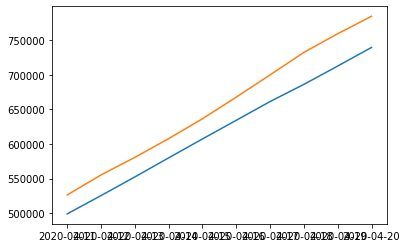

In [142]:
plt.plot(prediction['ds'],prediction['yhat'])
plt.plot(prediction['ds'],prophet_df['y'].iloc[-10:])

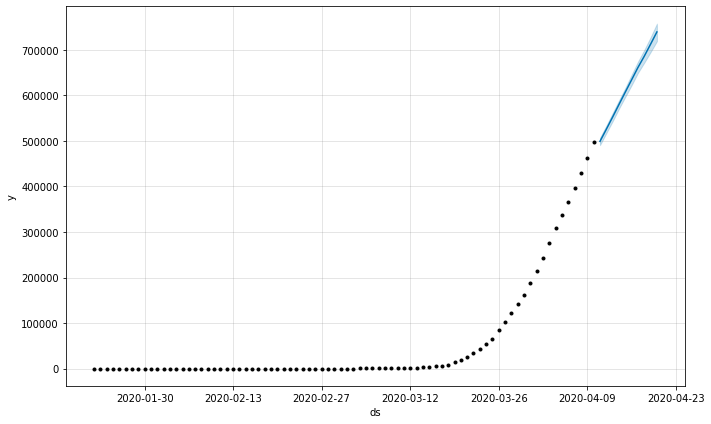

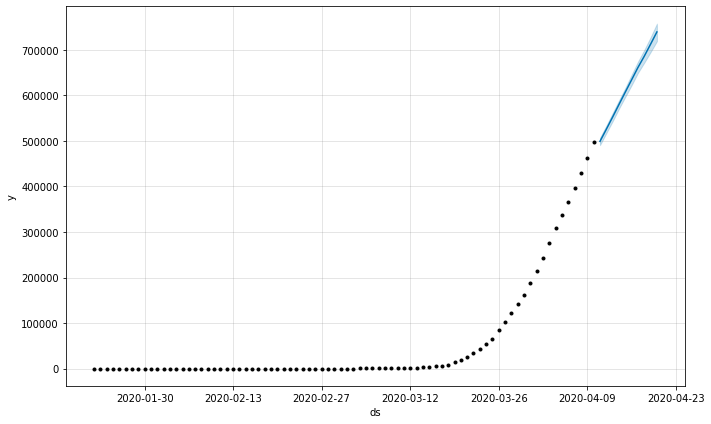

In [144]:
m.plot(prediction)

In [147]:
#TODO : Parameter tune prophet
#TODO : DEFINITELY WORK ON THE LOG OF THE DATA
m = Prophet()

prophet_df['y'] = prophet_df['y'].apply(lambda x : np.log(x))

m.fit(prophet_df.iloc[:-10])
prediction = m.predict(prophet_df.iloc[-10:])
#results are not great

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


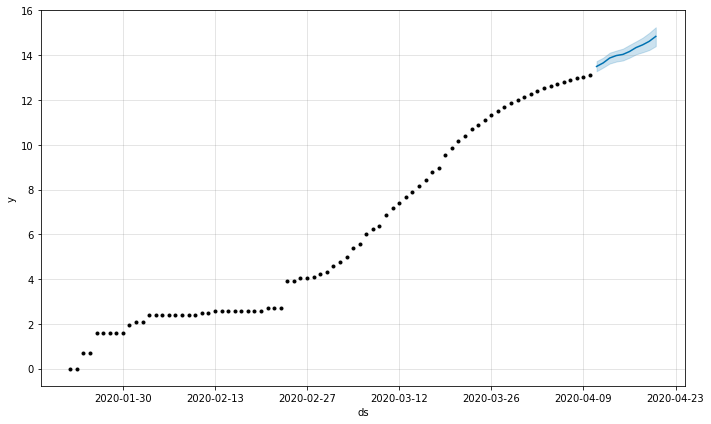

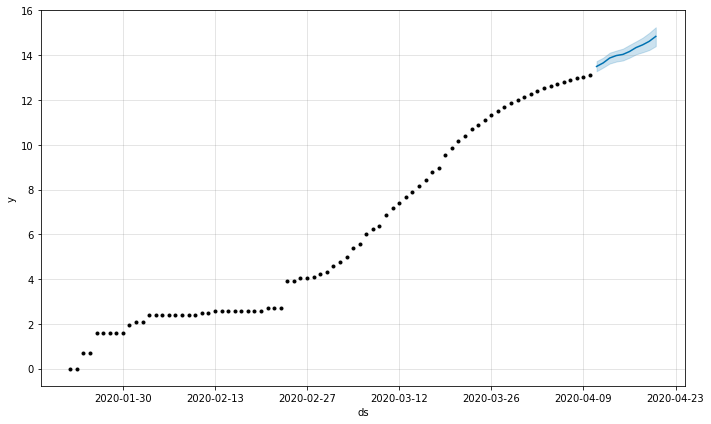

In [148]:
m.plot(prediction)